In [1]:
from utils import run_sim_collect_all_data, construct, plot_sim, sweep_with_testing, sample_action, get_observation, plot_testing, plot_b_matrices
import pymdp 
import numpy as np 
import utils
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
cmap0 = LinearSegmentedColormap.from_list("", ["white", "black"])
import seaborn as sns


observation_CC = [0]
observation_CD = [1]
observation_DC = [2]
observation_DD = [3]


def single_agent_run(observation, agent):
    agent.D = np.array([0.25,0.25,0.25,0.25])
    qs = agent.infer_states(observation)

    qp, efe = agent.infer_policies()

    action = sample_action(agent)
    agent.action = action

    return action, qs, qp


3.8.13

Memoryless strategies:

Unconditional Cooperator
Unconditional Defector 
Probability Cooperator
Tit for tat
Suspicious Tit for tat
Generous tit for tat (need to compare probabilities)
imperfect tit for tat 
grim
pavlov


Determinsitic agents with the same learning rate

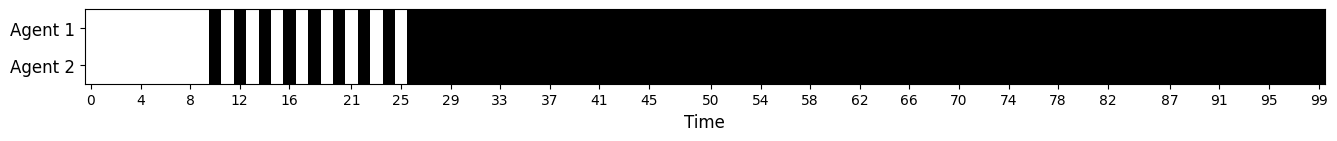

In [55]:
T = 100
agent_pavlov, agent_2, D = construct(lr_pB = 0.3, lr_pB_2= 0.3, factors_to_learn="all")

#training
actions_over_time, B1_over_time, q_pi_over_time, q_s_over_time, agent = run_sim_collect_all_data(agent_pavlov, agent_2, observation_1 = [0], observation_2 = [0],D=D,T=T)
plot_sim(actions_over_time, aspect = 3)


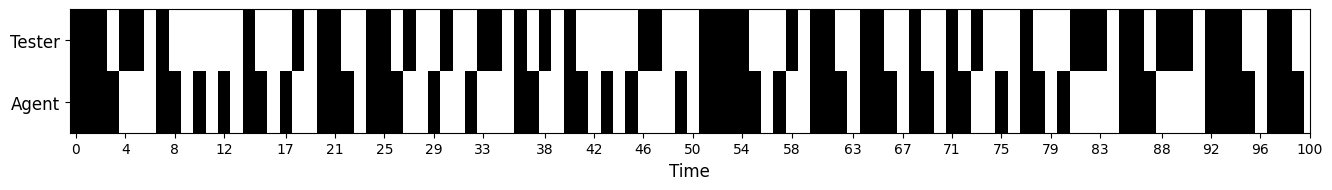

In [56]:
#testing
actions_over_time, agent = sweep_with_testing(agent_pavlov, agent_2, observation_1 = [0], T=T)
plot_testing(actions_over_time, aspect = 5)

#cooperate = 0 -- black


[[0.13513514 0.5        0.5        0.13513514]
 [0.86486486 0.5        0.5        0.86486486]]


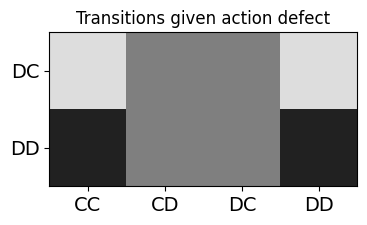

[[0.97787611 0.5        0.5        0.86486486]
 [0.02212389 0.5        0.5        0.13513514]]


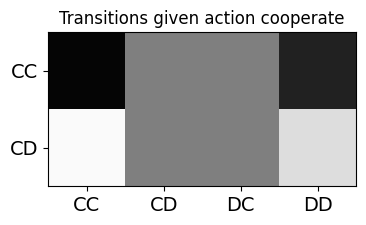

In [25]:
#strategy
plot_b_matrices(agent_pavlov)

Text(0.5, 1.0, 'Learned Pavlov Strategy')

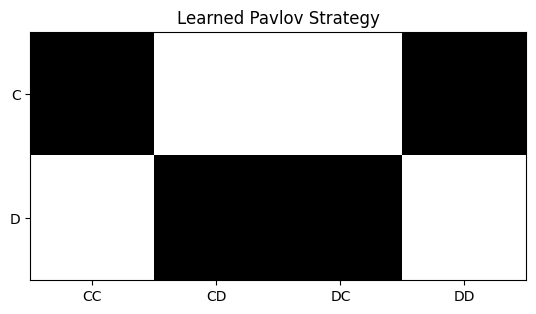

In [61]:
action_CC, qs, qp_CC = single_agent_run(observation_CC,agent_pavlov)
action_CD, qs, qp_CD = single_agent_run(observation_CD,agent_pavlov)
action_DC, qs, qp_DC = single_agent_run(observation_DC,agent_pavlov)
action_DD, qs, qp_DD = single_agent_run(observation_DD,agent_pavlov)
qpis = np.array([qp_CC,qp_CD,qp_DC,qp_DD])
plt.imshow(qpis.T,cmap=cmap0)
plt.yticks(range(2), labels = ['C','D'])
plt.xticks(range(4), labels = ['CC','CD', 'DC','DD'])
plt.title("Learned Pavlov Strategy")



agent_1, agent_2, D = construct(lr_pB = 0.01,lr_pB_2 = 0.01, factors_to_learn="all")
agent_1.action_selection = "stochastic"
agent_2.action_selection = "stochastic"
agent_1.alpha = 0.1
agent_2.alpha = 0.1
actions_over_time, B1_over_time, q_pi_over_time, qs_over_time, agent = run_sim_collect_all_data(agent_1, agent_2, observation_1 = [0], observation_2 = [0],D=D,T=900)
plot_sim(actions_over_time, aspect = 3)

always defect except at DD


agent_1, agent_2, D = construct(lr_pB = 0.5,lr_pB_2 = 0.53, factors_to_learn="all")
agent_1.action_selection = "stochastic"
agent_2.action_selection = "stochastic"
agent_1.alpha = 0.1
agent_2.alpha = 0.007
actions_over_time, B1_over_time, q_pi_over_time, qs_over_time, agent = run_sim_collect_all_data(agent_1, agent_2, observation_1 = [0], observation_2 = [0],D=D,T=900)
plot_sim(actions_over_time, aspect = 3)

defect if cooperate, cooperate if defect

(both oscillattory)

Gonna make matrices for specific strategies and compete against the matrices that emerge from stochasitc

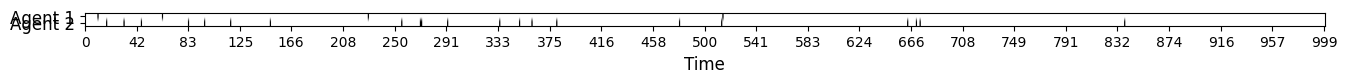

In [109]:
#train vs stochastic agent
agent_deterministic, agent_stochastic, D = construct(lr_pB = 0.3,lr_pB_2 = 0.3, factors_to_learn="all")
#agent_1.action_selection = "stochastic"
agent_stochastic.action_selection = "stochastic"
#agent_1.alpha = 5.0
agent_stochastic.alpha = 4.0
actions_over_time, B1_over_time, q_pi_over_time, qs_over_time, agent = run_sim_collect_all_data(agent_deterministic, agent_stochastic, observation_1 = [0], observation_2 = [0],D=D,T=1000)
plot_sim(actions_over_time, aspect = 5)



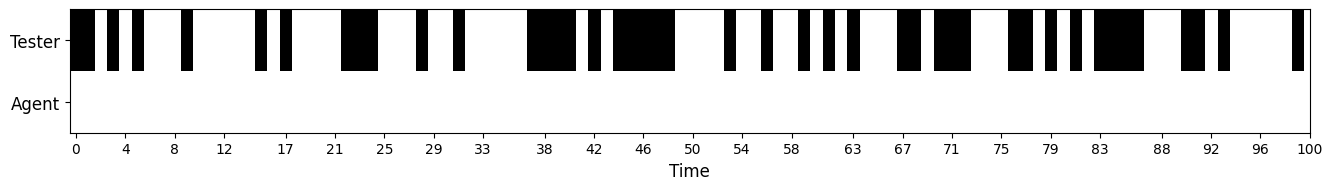

In [110]:
#testing
agent_deterministic.lr_pB = 0
actions_over_time, agent = sweep_with_testing(agent_deterministic, agent_stochastic, observation_1 = [0], T=100)
plot_testing(actions_over_time, aspect = 5)


[[0.38461538 0.22727273 0.11428571 0.02226027]
 [0.61538462 0.77272727 0.88571429 0.97773973]]


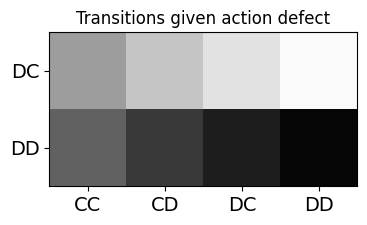

[[0.5        0.5        0.38461538 0.26315789]
 [0.5        0.5        0.61538462 0.73684211]]


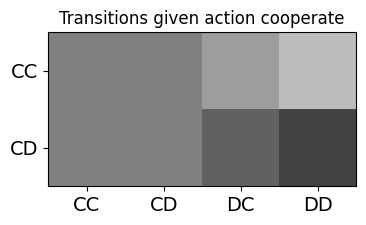

In [111]:
#strategy
plot_b_matrices(agent_deterministic)

([<matplotlib.axis.XTick at 0x13150aa30>,
 [Text(0, 0, 'CC'), Text(1, 0, 'CD'), Text(2, 0, 'DC'), Text(3, 0, 'DD')])

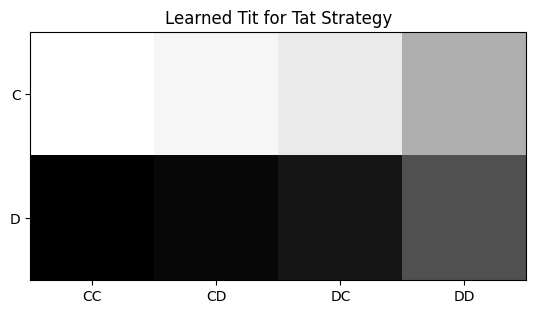

In [112]:
action_CC, qs, qp_CC = single_agent_run(observation_CC,agent)
action_CD, qs, qp_CD = single_agent_run(observation_CD,agent)
action_DC, qs, qp_DC = single_agent_run(observation_DC,agent)
action_DD, qs, qp_DD = single_agent_run(observation_DD,agent)
qpis = np.array([qp_CC,qp_CD,qp_DC,qp_DD])
plt.title("Learned Tit for Tat Strategy")
plt.imshow(qpis.T,cmap=cmap0)
plt.yticks(range(2), labels = ['C','D'])
plt.xticks(range(4), labels = ['CC','CD', 'DC','DD'])


defect if CD or DD, cooperate if CC or DC (this is tit for tat!)

In [98]:
agent_tit_for_tat.lr_pB

0

In [95]:
agent_pavlov.lr_pB = 

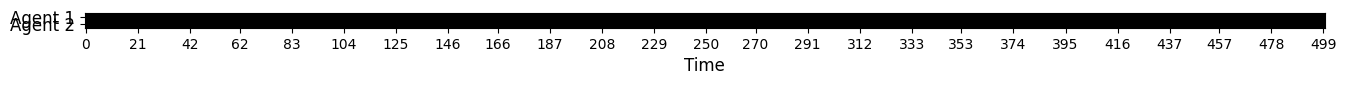

In [99]:

actions_over_time, B1_over_time, q_pi_over_time, qs_over_time, agent = run_sim_collect_all_data(agent_pavlov, agent, observation_1 = [0], observation_2 = [0],D=D,T=500)
plot_sim(actions_over_time, aspect = 3)
